/Users/emileheyberger/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host '82.65.155.71'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/emileheyberger/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host '82.65.155.71'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[{'name': 'jeedom'}, {'name': '_internal'}]
5
['time', 'value']
                            time     value
0      2022-05-26 13:37:06+00:00  1652.181
1      2022-05-26 13:38:05+00:00  1648.978
2      2022-05-26 13:39:05+00:00  1651.077
3      2022-05-26 13:40:05+00:00  1641.309
4      2022-05-26 13:41:05+00:00  1630.629
...                          ...       ...
458536 2023-01-30 14:01:06+00:00   600.993
458537 2023-01-30 14:02:04+00:00   613.752
458538 2023-01-30 14:05:07+00:00   596.971
458539 2023-01-30 14:06:05+00:00   596.090
458540 2023-01-30 14:07:06+00:00   591.036

[305847 rows x 2 columns]


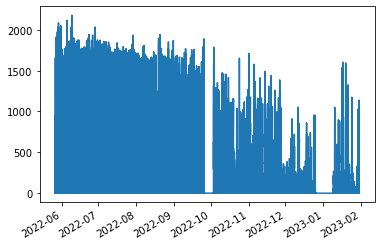

In [3]:
from http.server import BaseHTTPRequestHandler, HTTPServer
import urllib
import time
from influxdb import InfluxDBClient
import sys
import csv
import pandas as pd
import matplotlib.pyplot as plt

###########################
#    SCRIPT SETTINGS
###########################
# Set the port where you want the bridge service to run
PORT_NUMBER = 1234
# InfluxDB Server parameters
INFLUXDB_SERVER_IP = '82.65.155.71'
INFLUXDB_SERVER_PORT = 8086
INFLUXDB_USERNAME = 'eleves'
INFLUXDB_PASSWORD = 'SmarthouseG2Elab'
INFLUXDB_DB_NAME = 'jeedom'
###########################

client = InfluxDBClient(INFLUXDB_SERVER_IP, INFLUXDB_SERVER_PORT, INFLUXDB_USERNAME, INFLUXDB_PASSWORD, INFLUXDB_DB_NAME,ssl=True, verify_ssl=False)

print(client.get_list_database())

client.switch_database('jeedom')

datasheet_prod = client.query('SELECT "value" FROM "jeedom"."autogen"."132725" WHERE time > now() - 365d')
datasheet_conso = client.query('SELECT "value" FROM "jeedom"."autogen"."5224" WHERE time > now() - 365d')



#print(datasheet)

exported_data_prod = list(datasheet_prod.get_points())
header_list = list(exported_data[0].keys())

with open("/Users/emileheyberger/Downloads/smartsystem/dataraw.csv", "w", newline='') as fp:
    writer = csv.writer(fp, dialect='excel')
#    print(header_list[1:])
    value_header = header_list[1]
    offset = sum(c.isalpha() for c in value_header)
    print(offset)
    #header_list[1:] = sorted(header_list[1:], key=lambda x: int(x[offset:]))
    header_list[1:] = ['value']
    print(header_list)
    writer.writerow(header_list)
    for line in exported_data:
#        print(line)
        writer.writerow([line[kn] for kn in header_list])

df = pd.read_csv('/Users/emileheyberger/Downloads/smartsystem/dataraw.csv')

df['time'] =pd.to_datetime(df['time'])
df['time'] = df['time'].dt.floor('s')
df.drop_duplicates(inplace=True)

x = df['time']
#print(x)
y = df['value']
#print(y)

print(df)

plt.plot(x,y)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

df.to_csv('/Users/emileheyberger/Downloads/smartsystem/datadoubleremoved.csv',index=False)


In [12]:
 pip install influxdb

     |████████████████████████████████| 77 kB 1.7 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.
